In [2]:
import pandas as pd
import numpy as np
import datetime
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import os
import io
%matplotlib inline
from IPython.display import Image

In [7]:
df=pd.read_csv("recorridos-realizados-2018.CSV", encoding='latin-1', delimiter=',')

In [127]:
#muestra las primeras 5 filas
df.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,bici_direccion,bici_pais
0,15728,26/05/2018 15:32:07,0:08:52,F. J. Santamaría de Oro,125,Acuña de Figueroa,54,M,28.0,TTE BENJAMIN MATIENZO,Argentina
1,26531,26/05/2018 3:42:41,0:30:49,Yatay,121,Hospital Garrahan,107,M,26.0,LAVALLE,Argentina
150,232,08/04/2015 18:31:06,0:12:06,Aduana,3,Retiro,2,M,39.0,BESARES,Argentina
151,289,15/04/2015 17:19:51,0:36:36,Parque Centenario,29,Parque Patricios,21,M,30.0,INDEPENDENCIA,Argentina
152,1426,15/04/2015 11:25:42,0:08:11,Montevideo,27,Suipacha,23,M,42.0,MONTEVIDEO,Argentina


In [9]:
#muestra las ultimas 5 filas
df.tail()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,bici_direccion,bici_pais
1457504,237401,06/02/2018 9:53:35,0:11:32,Lerma,109,Coronel Díaz,59,F,41.0,Av Cordoba,NaN
1457505,235437,06/02/2018 15:30:47,0:15:37,Nicaragua,133,Plaza Palermo Viejo,56,F,24.0,Laprida,NaN
1457506,234242,06/02/2018 23:10:23,0:08:13,Billinghurst y Mansilla,181,Plaza Houssay,43,M,32.0,Callao,NaN
1457507,243609,06/02/2018 9:54:58,0:21:36,Ministerio de Justicia y Seguridad,126,Ministerio de Economía,61,M,36.0,Isabel La Catolica,NaN
1457508,241629,06/02/2018 23:21:56,0:32:53,Lavalle,84,Plaza Houssay,43,M,NaN,NaN,NaN


In [16]:
#MUESTRA LAS ESTACIONES UNICAS QUE HAY
df.bici_nombre_estacion_origen.unique()

array(['F. J. Santamaría de Oro', 'Yatay', 'Aime Paine',
       'Galerías Pacífico', 'Virrey Cevallos',
       'Pque. Jose Evaristo Uriburu', 'Pedro Echague',
       'Treinta y tres orientales', 'Fitz Roy', 'Córdoba', 'Posadas',
       'México', 'Godoy Cruz y Libertador', 'Malba', 'Della Paolera',
       'Vera Peñaloza', 'Roseti', 'Julieta Lanteri', 'Guatemala',
       'Misiones', 'Marcelo T. de Alvear', 'Azucena Villaflor',
       'Aranguren', 'Villarroel', 'Armenia y Gorriti', 'Bouchard',
       'Paraná', 'Costa Rica', 'Parque Rivadavia', 'Carlos Calvo',
       'Castillo', 'Planetario', 'Hospital Italiano', 'Hipolito Yrigoyen',
       'Lima', 'Billinghurst', 'Carlos Gardel', 'Fitz Roy y Gorriti',
       'Billinghurst y Mansilla', 'Quintana',
       'Peron y F. Acuña de Figueroa', '25 de Mayo', 'Federico Lacroze',
       'Austria y French', 'Humahuaca', 'Esmeralda', 'Quintino Bocayuva',
       'Guardia Vieja', 'Lerma', 'Arenales y Aguero',
       'Facultad de Medicina', 'Pasteur', 'Co

In [18]:
#ELIMINO LOS VALORES NULL
df = df.dropna()

Text(0.5, 1.0, 'estaciones estaciones de origen y frecuencia de uso')

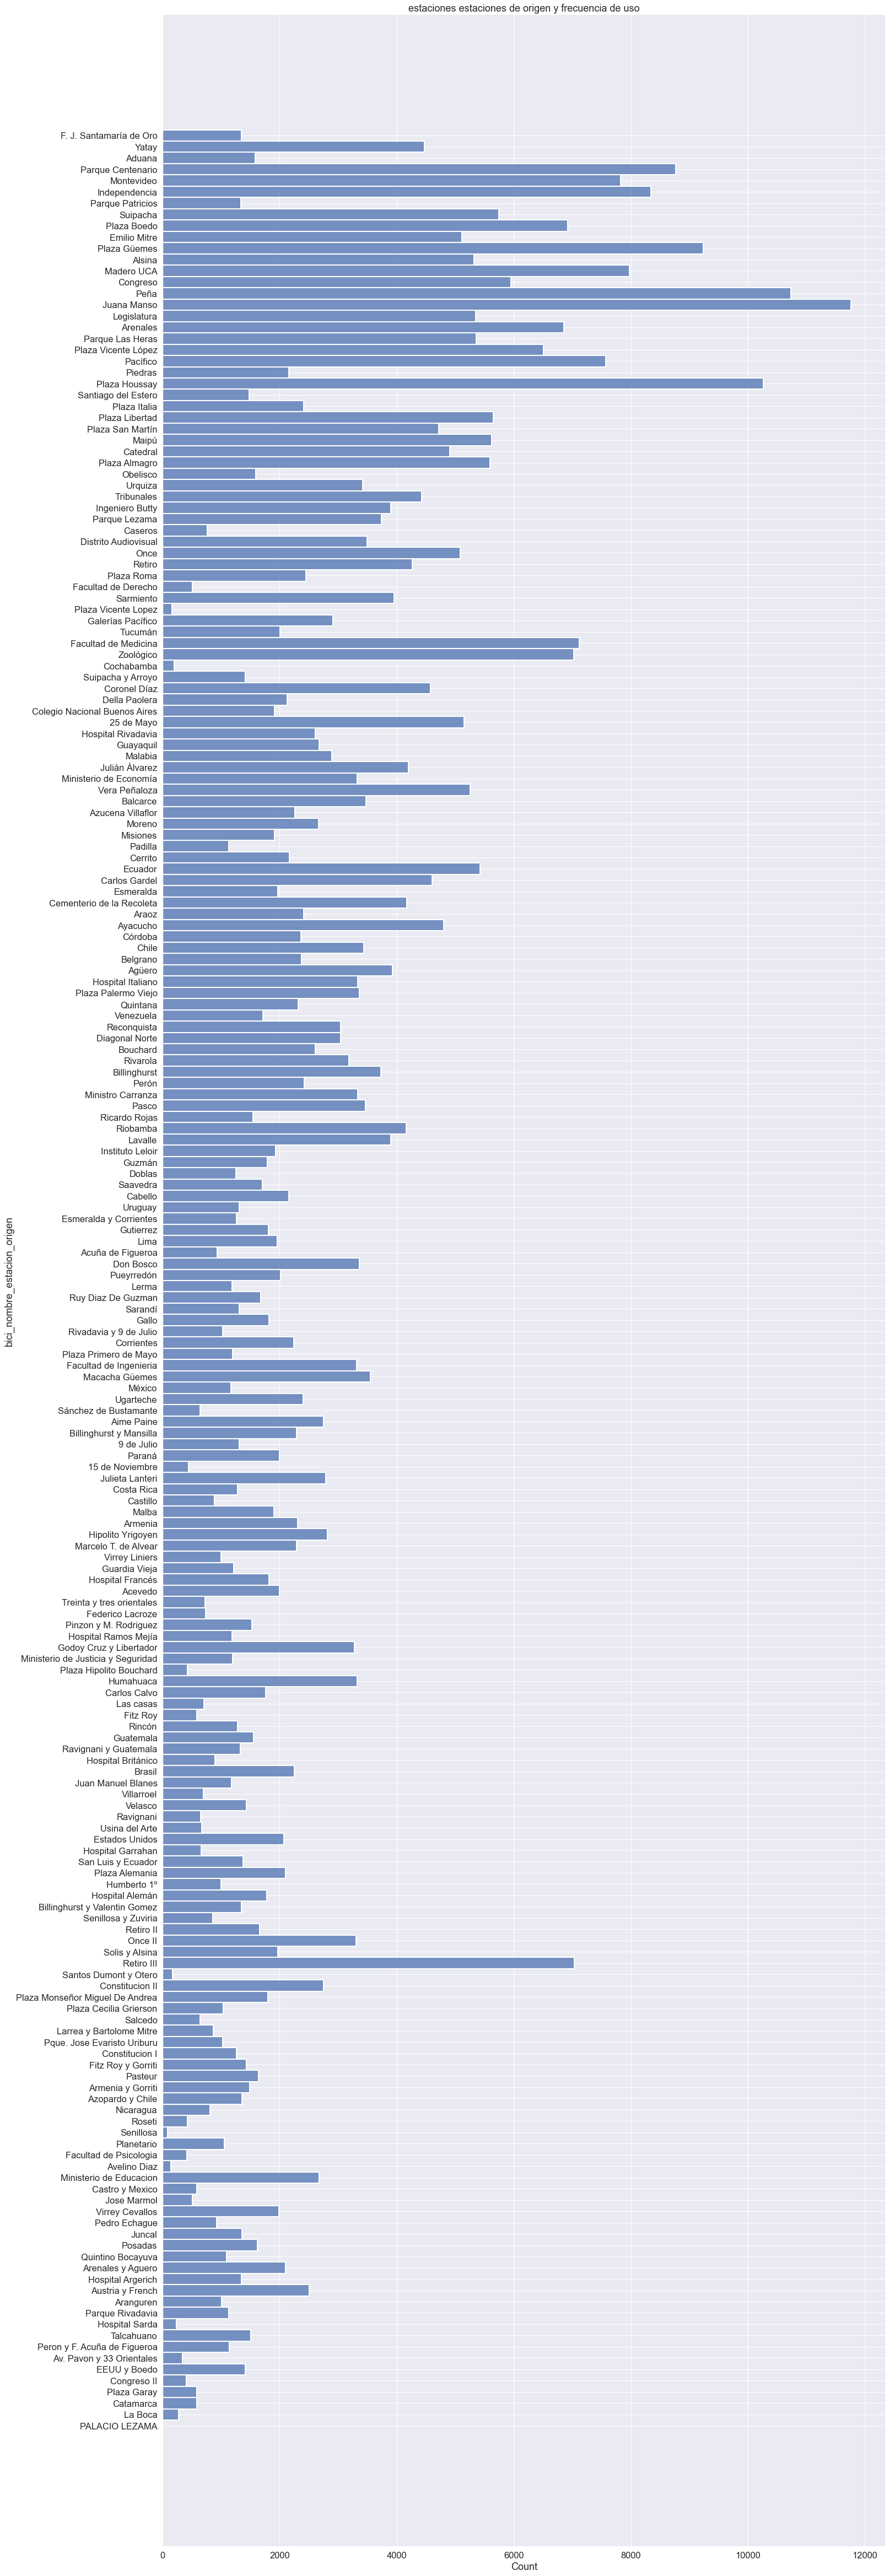

In [67]:
#estaciones estaciones de origen 
sns.set(font_scale=1.5)
sns.displot(df, y='bici_nombre_estacion_origen', height= 65, aspect= 0.35).savefig("estaciones estaciones de origen y frecuencia de uso.png")
plt.title("estaciones estaciones de origen y frecuencia de uso")


In [125]:
EMU = df['bici_nombre_estacion_origen'].value_counts().rename_axis('Estaciones').reset_index(name='Cantidad de salidas')
print('Datos estadisticos de Salidas')
print(pd.DataFrame.describe(EMU))
#Muestra TOP 30 estaciones de origen
EMU.head(30)

Datos estadisticos de Salidas
       Cantidad de salidas
count           204.000000
mean           2609.676471
std            2150.372568
min               1.000000
25%            1186.250000
50%            1968.000000
75%            3374.500000
max           11760.000000


,Estaciones,Cantidad de salidas
0,Juana Manso,11760
1,Peña,10730
2,Plaza Houssay,10262
3,Plaza Güemes,9240
4,Parque Centenario,8770
5,Independencia,8340
6,Madero UCA,7978
7,Montevideo,7826
8,Pacífico,7574
9,Facultad de Medicina,7120


<AxesSubplot:xlabel='Cantidad de salidas', ylabel='Estaciones'>

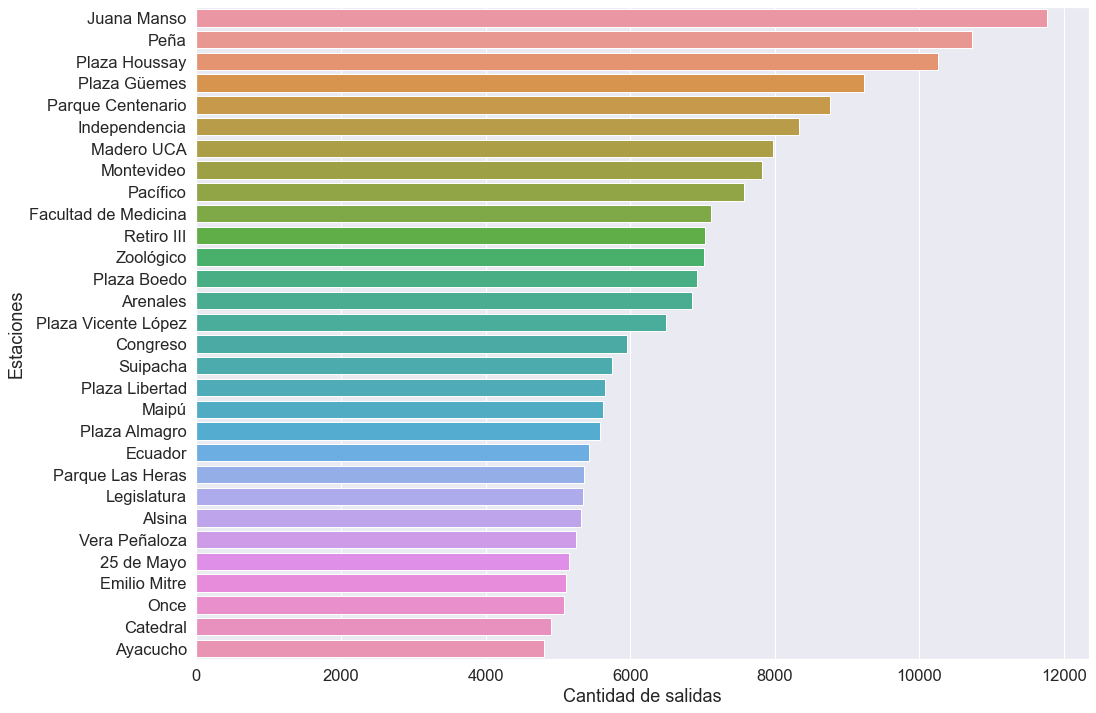

In [159]:
#TOP 30 ESTACIONES CON MAS SALIDAS
sns.set_color_codes("pastel")
plt.figure(figsize=(16, 12))
sns.barplot(x="Cantidad de salidas", y="Estaciones", data=EMU.head(30))

In [126]:
EAR = df['bici_nombre_estacion_destino'].value_counts().rename_axis('Estaciones').reset_index(name='Cantidad de arribos')
print('Datos estadisticos de arribos')
print(pd.DataFrame.describe(EAR))
#Muestra TOP 30 estaciones de arribos
EAR.head(30)

Datos estadisticos de arribos
       Cantidad de arribos
count           201.000000
mean           2648.626866
std            4842.061112
min               3.000000
25%             291.000000
50%             864.000000
75%            2203.000000
max           30040.000000


,Estaciones,Cantidad de arribos
0,Retiro,30040
1,Parque Las Heras,27514
2,Facultad de Derecho,27299
3,Congreso,17652
4,Pacífico,17619
5,Parque Lezama,17231
6,Once,16037
7,Plaza Italia,15890
8,Plaza Almagro,14279
9,Plaza Roma,14002


<AxesSubplot:xlabel='Cantidad de arribos', ylabel='Estaciones'>

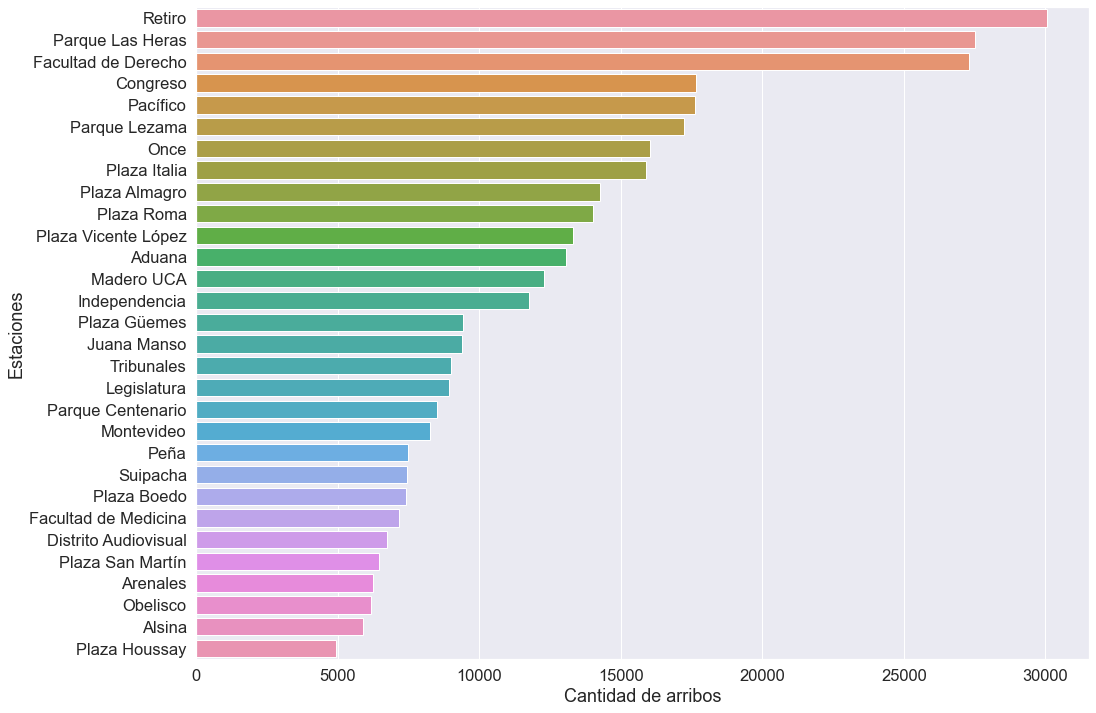

In [160]:
#TOP 30 DE ESTACIONES CON MAYOR ARRIBOS
sns.set_color_codes("pastel")
plt.figure(figsize=(16, 12))
sns.barplot(x="Cantidad de arribos", y="Estaciones", data=EAR.head(30))

In [166]:
#TOP PAIS
biciPais = df['bici_pais'].value_counts().rename_axis('Bici pais').reset_index(name='Cantidad')
biciPais

,Bici pais,Cantidad
0,Argentina,531530
1,Colombia,485
2,Venezuela,90
3,Perú,77
4,Haití,75
5,Bolivia,56
6,Uruguay,32
7,Brasil,10
8,Macao,7
9,Portugal,4


In [168]:
biciEdad = df['bici_edad'].value_counts().rename_axis('bici_edad').reset_index(name='Cantidad')
biciEdad.head(25)

,bici_edad,Cantidad
0,28.0,25263
1,27.0,24578
2,30.0,24575
3,29.0,24542
4,26.0,22794
5,31.0,22105
6,25.0,21718
7,24.0,20140
8,32.0,19325
9,33.0,17000


<AxesSubplot:xlabel='bici_edad', ylabel='Cantidad'>

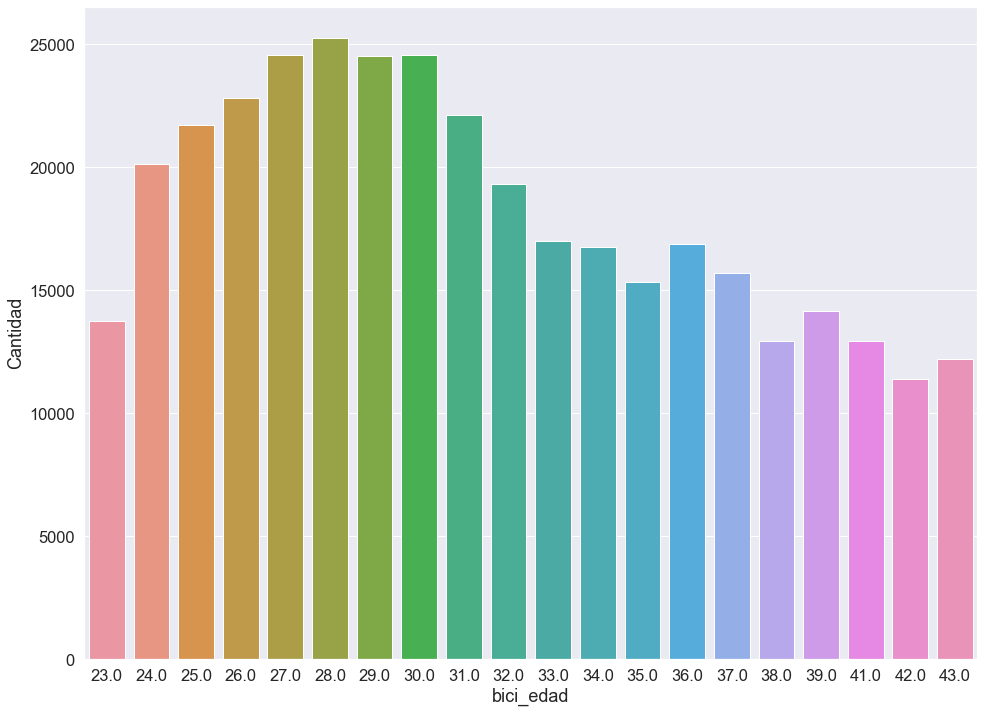

In [171]:
#TOP 20 EDADES QUE USAN LAS BICI
sns.set_color_codes("pastel")
plt.figure(figsize=(16, 12))
sns.barplot(y="Cantidad", x="bici_edad", data=biciEdad.head(20))